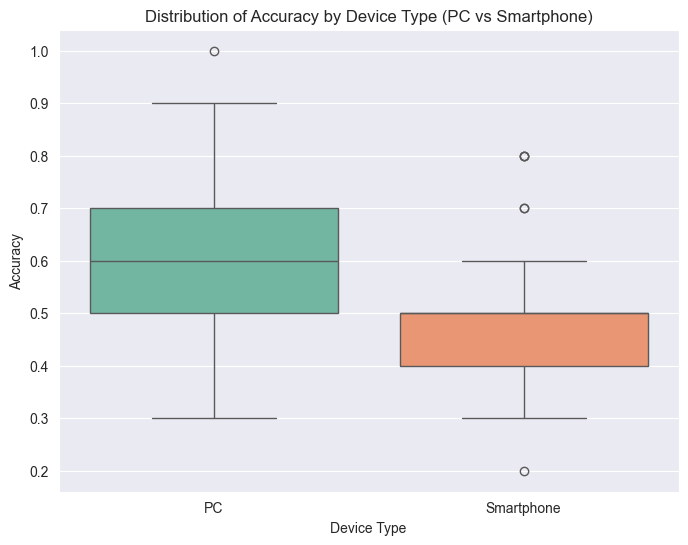

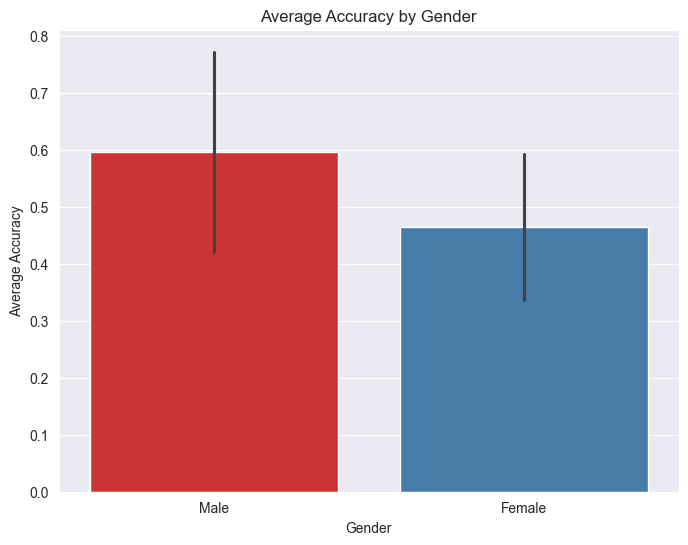

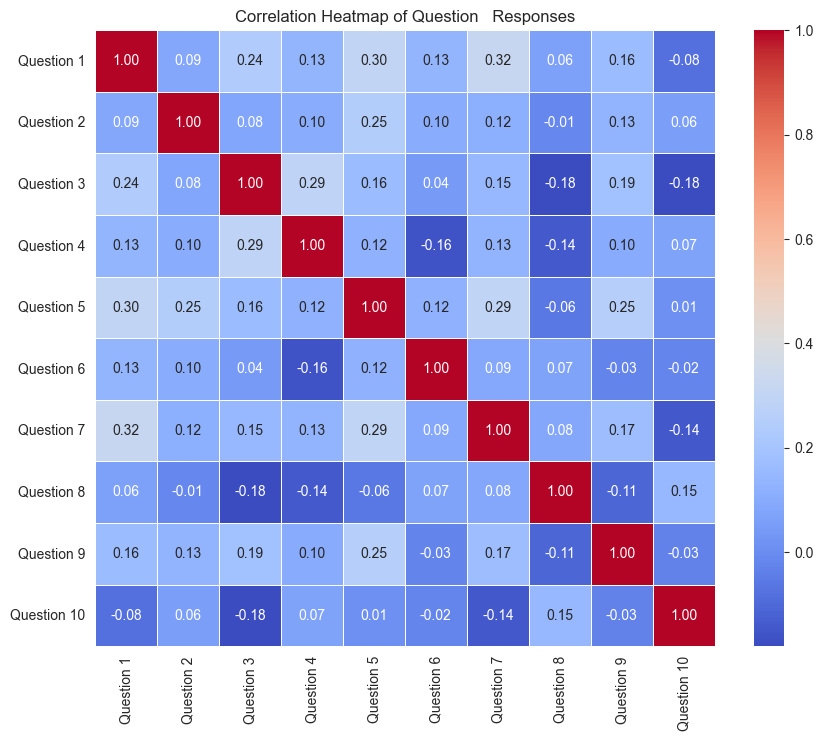

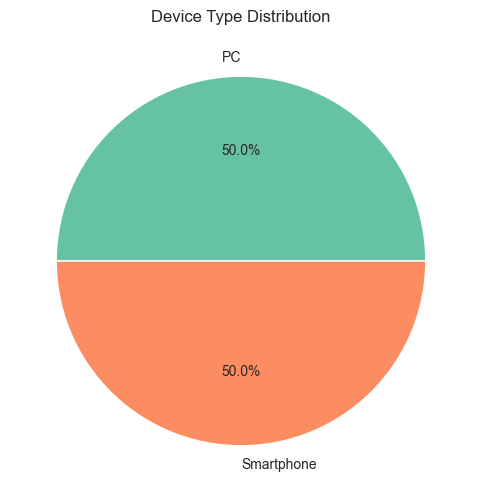

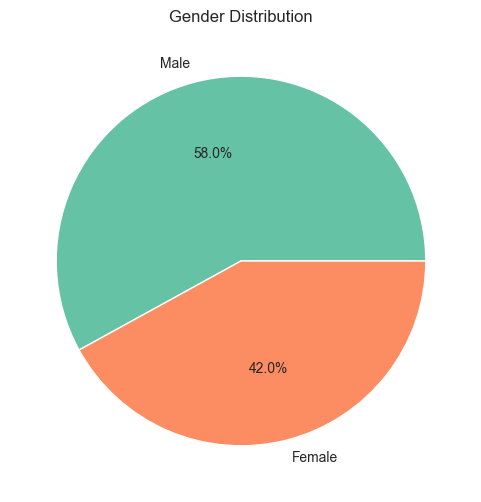

C:\Users\yovel\AppData\Local\Temp\ipykernel_24220\233534115.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)


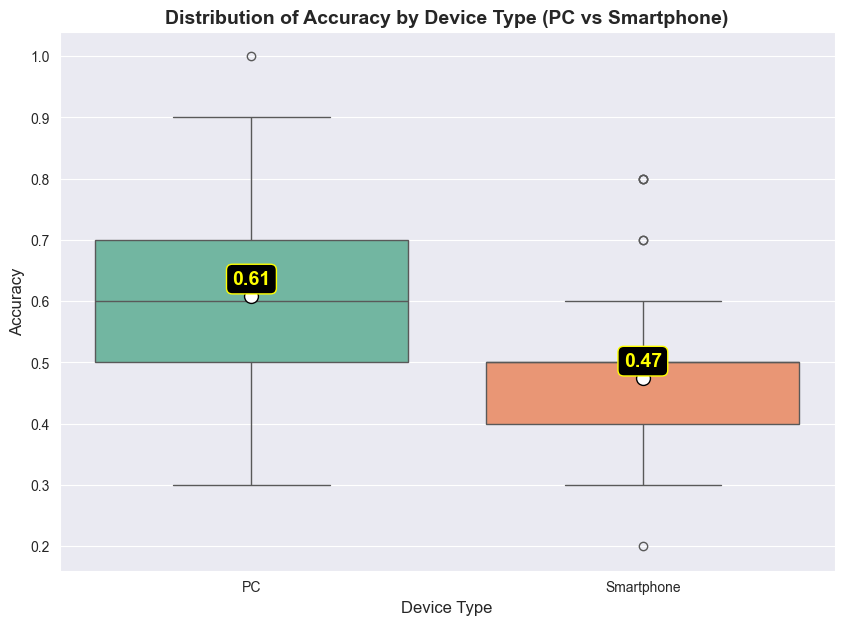

C:\Users\yovel\AppData\Local\Temp\ipykernel_24220\233534115.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)


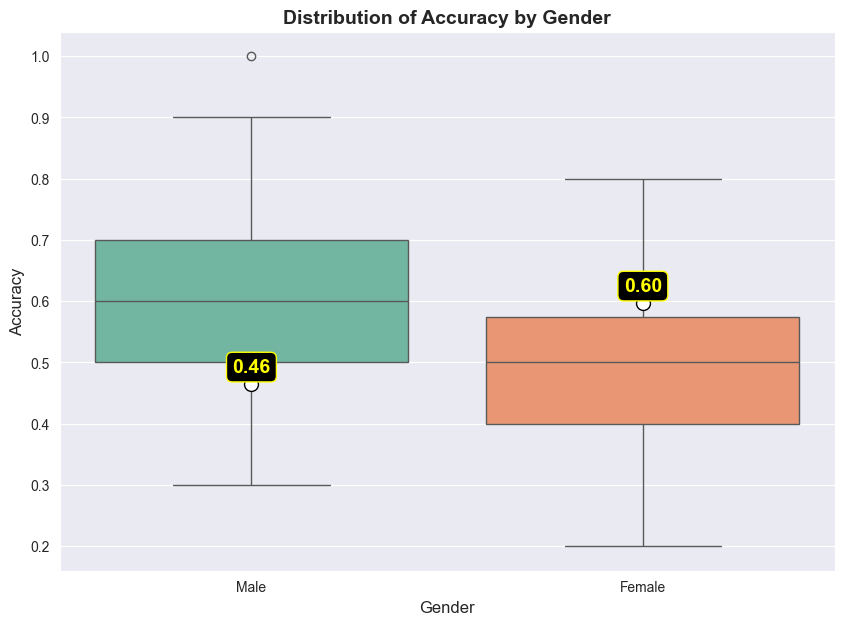

C:\Users\yovel\AppData\Local\Temp\ipykernel_24220\233534115.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)


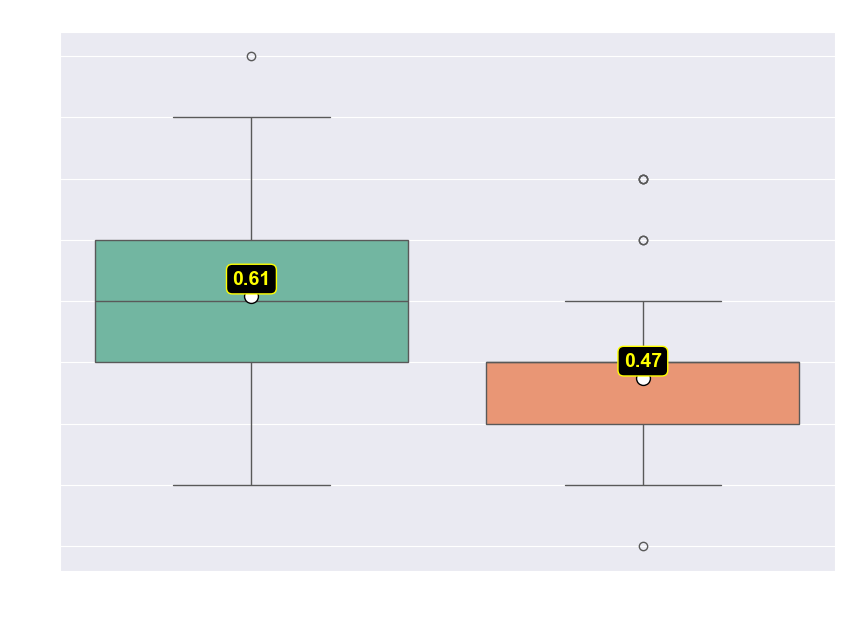

C:\Users\yovel\AppData\Local\Temp\ipykernel_24220\233534115.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)


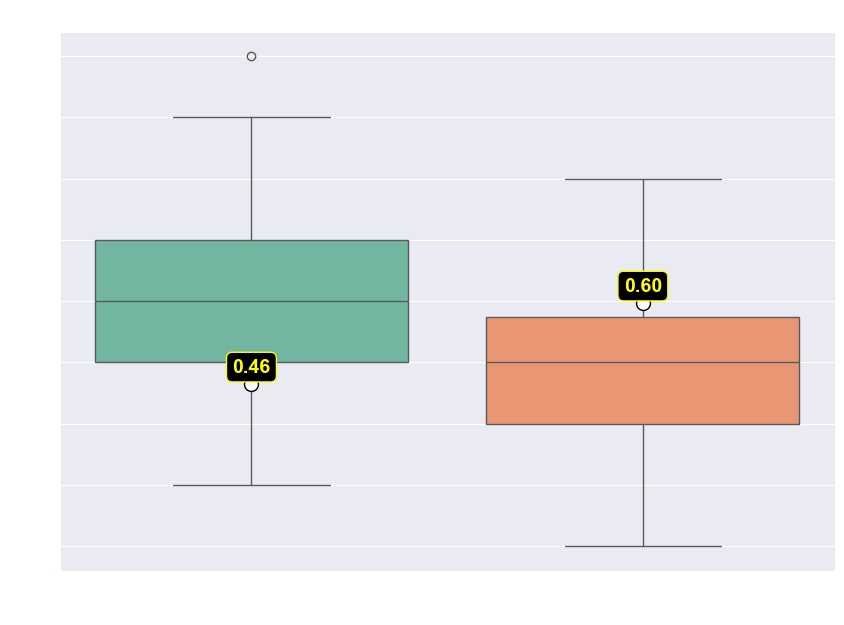

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Load Data
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 Step 2: Convert Responses to Numerical Values
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}  # Treat "Don't know" as incorrect (0)
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 Step 3: Define Correct Answers
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 Step 4: Calculate Accuracy (Now "Don't know" is treated as incorrect)
df["Accuracy"] = df[question_cols].apply(
    lambda row: np.mean([1 if row[q] == correct_answers[q] else 0 for q in question_cols]), axis=1
)

# 🔹 Step 5: Visualization 1 - Distribution of Accuracy by Device Type (PC vs Smartphone)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="I'm answering the survey on a:", y="Accuracy", hue="I'm answering the survey on a:", palette="Set2", legend=False)
plt.title('Distribution of Accuracy by Device Type (PC vs Smartphone)')
plt.xlabel('Device Type')
plt.ylabel('Accuracy')
plt.show()

# 🔹 Step 6: Visualization 2 - Bar Plot of Accuracy by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="What is your gender?", y="Accuracy", errorbar="sd", hue="What is your gender?", palette="Set1", legend=False)
plt.title('Average Accuracy by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Accuracy')
plt.show()

# 🔹 Step 7: Visualization 3 - Correlation Heatmap of Question Responses (Now includes "Don't know" as incorrect)
correlation_matrix = df[question_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Question   Responses')
plt.show()

# 🔹 Step 8: Visualization 4 - Pie Chart of Device Type Distribution
device_counts = df["I'm answering the survey on a:"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(device_counts)))
plt.title('Device Type Distribution')
plt.show()

# 🔹 Step 8: Visualization 5 - Pie Chart of Gender Distribution
Gender_counts = df["What is your gender?"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", n_colors=len(Gender_counts)))
plt.title('Gender Distribution')
plt.show()


# 🔹 Function to Create Boxplot with Mean Annotation
def create_boxplot_with_mean(data, x_col, y_col, title, xlabel, ylabel, palette="Set2"):
    plt.figure(figsize=(10, 7))
    sns.set_style("darkgrid")  # Keep the same style as in your original image
    ax = sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)

    # Compute means and annotate them with a white dot
    means = data.groupby(x_col)[y_col].mean()
    for i, mean in enumerate(means):
        ax.scatter(i, mean, color='white', s=100, marker='o', edgecolors='black', zorder=3)  # White dot
        ax.text(i, mean + 0.02, f'{mean:.2f}', ha='center', fontsize=14, fontweight='bold', color='yellow', bbox=dict(facecolor='black', edgecolor='yellow', boxstyle='round,pad=0.3'))


    # Formatting
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Show plot
    plt.show()

# 🔹 Create Boxplot for Device Type vs Accuracy
create_boxplot_with_mean(
    data=df,
    x_col="I'm answering the survey on a:",
    y_col="Accuracy",
    title="Distribution of Accuracy by Device Type (PC vs Smartphone)",
    xlabel="Device Type",
    ylabel="Accuracy"
)

# 🔹 Create Boxplot for Gender vs Accuracy
create_boxplot_with_mean(
    data=df,
    x_col="What is your gender?",
    y_col="Accuracy",
    title="Distribution of Accuracy by Gender",
    xlabel="Gender",
    ylabel="Accuracy"
)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🔹 Function to Create Boxplot with Mean Annotation
def create_boxplot_with_mean(data, x_col, y_col, title, xlabel, ylabel, palette="Set2"):
    plt.figure(figsize=(10, 7))
    sns.set_style("darkgrid")  # Keep the same style as in your original image
    ax = sns.boxplot(data=data, x=x_col, y=y_col, palette=palette)

    # Compute means and annotate them with a white dot and clearly visible text
    means = data.groupby(x_col)[y_col].mean()
    for i, mean in enumerate(means):
        ax.scatter(i, mean, color='white', s=100, marker='o', edgecolors='black', zorder=3)  # White dot
        ax.text(i, mean + 0.02, f'{mean:.2f}', ha='center', fontsize=14, fontweight='bold', color='yellow', bbox=dict(facecolor='black', edgecolor='yellow', boxstyle='round,pad=0.3'))

    # Formatting
    plt.title(title, fontsize=14, fontweight='bold', color='white')
    plt.xlabel(xlabel, fontsize=12, color='white')
    plt.ylabel(ylabel, fontsize=12, color='white')
    plt.xticks(fontsize=10, color='white')
    plt.yticks(fontsize=10, color='white')

    # Show plot
    plt.show()

# 🔹 Create Boxplot for Device Type vs Accuracy
create_boxplot_with_mean(
    data=df,
    x_col="I'm answering the survey on a:",
    y_col="Accuracy",
    title="Distribution of Accuracy by Device Type (PC vs Smartphone)",
    xlabel="Device Type",
    ylabel="Accuracy"
)

# 🔹 Create Boxplot for Gender vs Accuracy
create_boxplot_with_mean(
    data=df,
    x_col="What is your gender?",
    y_col="Accuracy",
    title="Distribution of Accuracy by Gender",
    xlabel="Gender",
    ylabel="Accuracy"
)



C:\Users\yovel\AppData\Local\Temp\ipykernel_24220\1493944103.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gender")


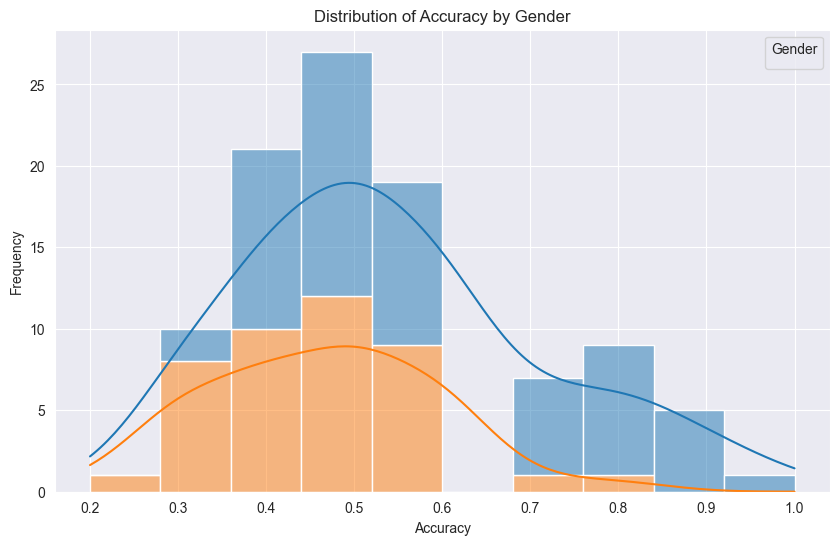

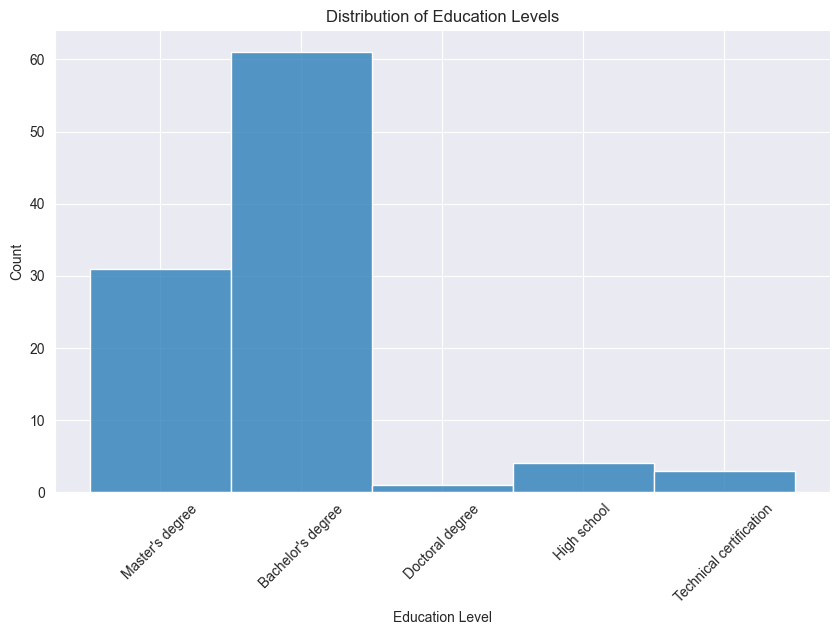

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 טעינת הנתונים
file_path = "data.xlsx"
df = pd.read_excel(file_path, sheet_name="All")

# 🔹 המרת תשובות לערכים מספריים
conversion_dict = {"Phishing": 1, "Phising": 1, "Legitimate": 0, "Don't know": 0}
question_cols = [col for col in df.columns if "Question" in col]
df[question_cols] = df[question_cols].apply(lambda col: col.map(conversion_dict))

# 🔹 הגדרת תשובות נכונות
correct_answers = {
    "Question 1": 1, "Question 2": 1, "Question 3": 1, "Question 4": 0, "Question 5": 1,
    "Question 6": 1, "Question 7": 1, "Question 8": 1, "Question 9": 1, "Question 10": 0
}

# 🔹 חישוב אחוזי הצלחה
df["Accuracy"] = df[question_cols].apply(
    lambda row: np.mean([1 if row[q] == correct_answers[q] else 0 for q in question_cols]), axis=1
)

# 🔹 גרף היסטוגרמה של התפלגות אחוזי ההצלחה לפי מין
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Accuracy", hue="What is your gender?", bins=10, kde=True, multiple="stack")
plt.title('Distribution of Accuracy by Gender')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend(title="Gender")
plt.show()

# 🔹 גרף היסטוגרמה של התפלגות רמת ההשכלה
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="What is your level of education?", bins=len(df["What is your level of education?"].unique()), kde=False)
plt.xticks(rotation=45)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()
